Unlocking Customer Value: Predicting CLV for E-Commerce Success

In this project, we aim to predict Customer Lifetime Value (CLV) for an e-commerce business. CLV represents the total revenue a business can expect from a customer over their entire relationship. By predicting CLV, businesses can focus their resources on high-value customers, enhance marketing strategies, and optimize customer acquisition efforts.

The goal of this project is to create a predictive model using transaction data to identify and prioritize customers who will generate the most long-term value.

Objective:
To predict Customer Lifetime Value (CLV) for each customer based on their transaction history and behavior.

To segment customers into different value categories (e.g., high, medium, low-value customers).

To provide actionable insights for marketing strategy and customer retention.

CODE IMPLEMENTATION

In [111]:
#Data Loading
import pandas as pd

file_path = '/Users/guru/DATA MINING/final_group_project/Online Retail.xlsx'
df = pd.read_excel(file_path)

df.head(100)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [6]:
# Data Preprocessing
df = df.dropna()
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df.drop_duplicates()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Feature Engineering
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
df['Recency'] = (snapshot_date - df['InvoiceDate']).dt.days

rfm = df.groupby('CustomerID').agg({
    'Recency': 'min',
    'InvoiceNo': 'nunique',
    'TotalSpent': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [8]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSpent,Recency
count,392692.000000,392692,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500,152.204379
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,1.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000,50.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000,132.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000,247.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,374.000000
std,180.492832,NaN,22.241836,1713.539549,311.099224,112.691582


In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSpent     0
Recency        0
dtype: int64

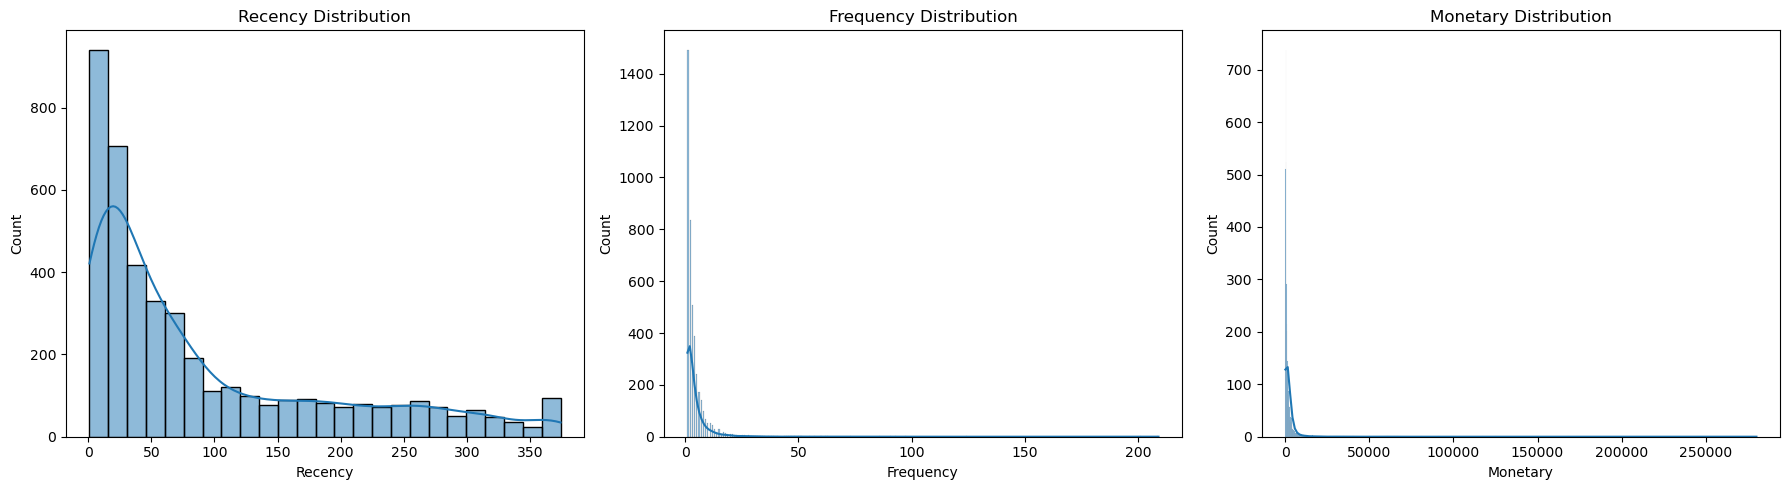

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], kde=True, ax=ax[0]).set_title('Recency Distribution')
sns.histplot(rfm['Frequency'], kde=True, ax=ax[1]).set_title('Frequency Distribution')
sns.histplot(rfm['Monetary'], kde=True, ax=ax[2]).set_title('Monetary Distribution')
plt.tight_layout()
plt.show()

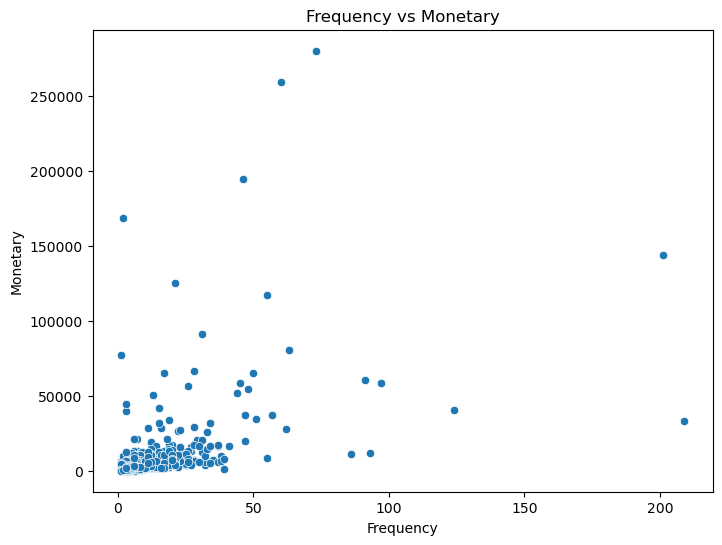

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

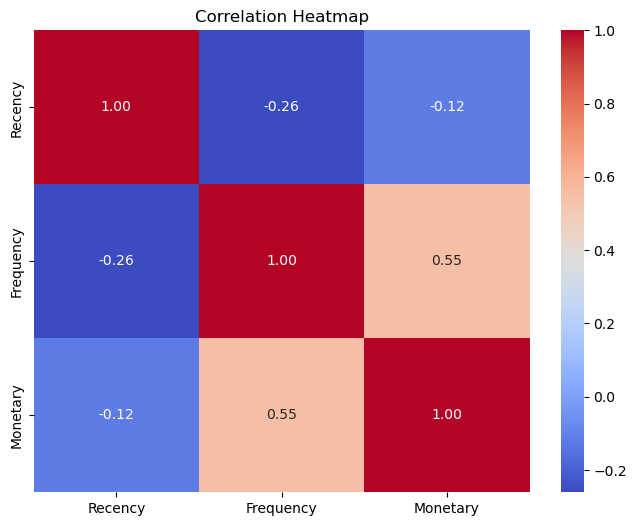

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

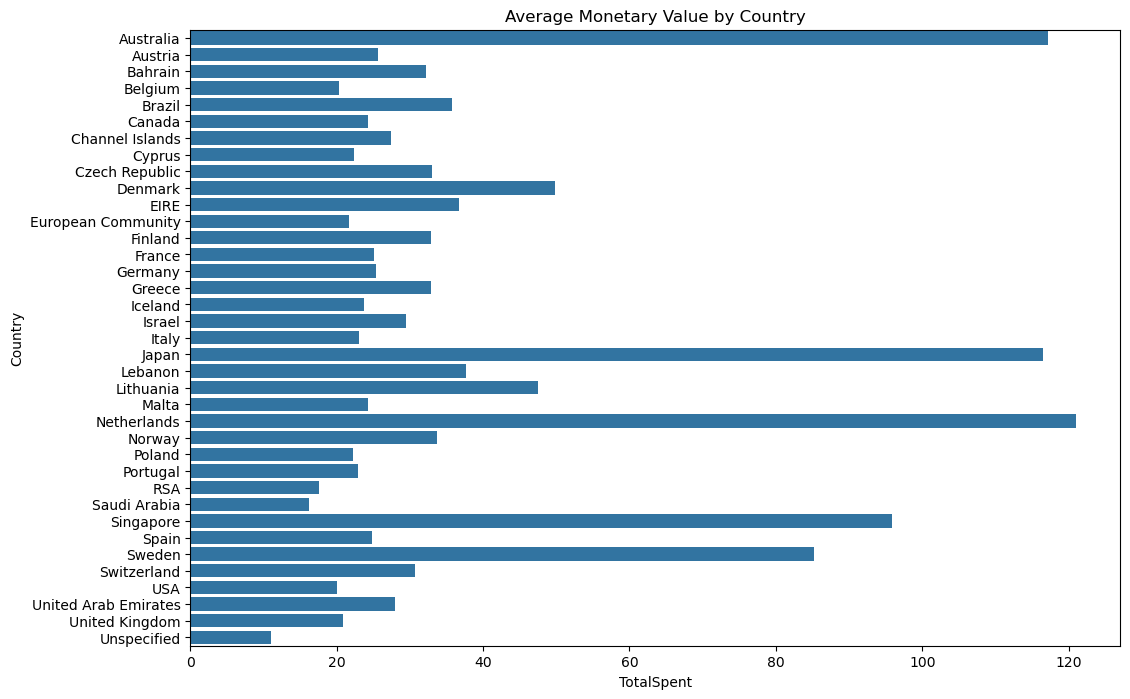

In [13]:
country_rfm = df.groupby('Country').agg({'TotalSpent': 'mean'}).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalSpent', y='Country', data=country_rfm)
plt.title('Average Monetary Value by Country')
plt.show()

In [31]:
#Random Forest

In [29]:
# Data Preprocessing for Random Forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features and target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Monetary']

# Train-Test Split (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict with the trained model
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# Evaluate Random Forest performance
rf_mae_train = mean_absolute_error(y_train, rf_train_preds)
rf_mae_test = mean_absolute_error(y_test, rf_test_preds)
rf_r2_train = r2_score(y_train, rf_train_preds)
rf_r2_test = r2_score(y_test, rf_test_preds)

print(f"Random Forest Regressor MAE (Train): {rf_mae_train}, MAE (Test): {rf_mae_test}")
print(f"Random Forest Regressor R² (Train): {rf_r2_train}, R² (Test): {rf_r2_test}")


Random Forest Regressor MAE (Train): 26.24690064265148, MAE (Test): 31.11051300691247
Random Forest Regressor R² (Train): 0.9947267446801221, R² (Test): 0.9985386755436543


In [ ]:
#feature importance for random forest

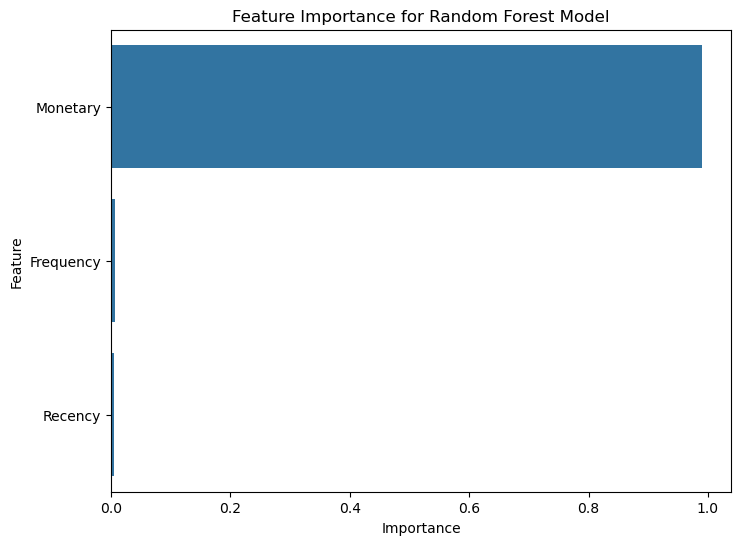

In [43]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': ['Recency', 'Frequency', 'Monetary'],
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest Model')
plt.show()


In [ ]:
#Ridge reg

In [33]:
# Data Preprocessing for Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Start with a default alpha of 1.0
ridge_model.fit(X_train_scaled, y_train)

# Predict with the Ridge model
ridge_train_preds = ridge_model.predict(X_train_scaled)
ridge_test_preds = ridge_model.predict(X_test_scaled)

# Evaluate Ridge Regression performance
ridge_mse_train = mean_squared_error(y_train, ridge_train_preds)
ridge_mse_test = mean_squared_error(y_test, ridge_test_preds)
ridge_r2_train = r2_score(y_train, ridge_train_preds)
ridge_r2_test = r2_score(y_test, ridge_test_preds)

print(f"Ridge Regression MSE (Train): {ridge_mse_train}, MSE (Test): {ridge_mse_test}")
print(f"Ridge Regression R² (Train): {ridge_r2_train}, R² (Test): {ridge_r2_test}")


Ridge Regression MSE (Train): 8.836118983494755, MSE (Test): 11.166325809354172
Ridge Regression R² (Train): 0.9999998826585774, R² (Test): 0.9999998908709066


In [39]:
from sklearn.metrics import mean_absolute_error


ridge_mae_test = mean_absolute_error(y_test, ridge_test_preds)
print(ridge_mae_test)

0.5908306402834117


In [ ]:
#comapring both models

In [41]:
# Compare Random Forest and Ridge Regression
print(f"Random Forest R² (Test): {rf_r2_test}")
print(f"Ridge Regression R² (Test): {ridge_r2_test}")
print(f"Random Forest MAE (Test): {rf_mae_test}")
print(f"Ridge Regression MAE (Test): {ridge_mae_test}")


Random Forest R² (Test): 0.9985386755436543
Ridge Regression R² (Test): 0.9999998908709066
Random Forest MAE (Test): 31.11051300691247
Ridge Regression MAE (Test): 0.5908306402834117


In [ ]:
#residual plots for comparing both models

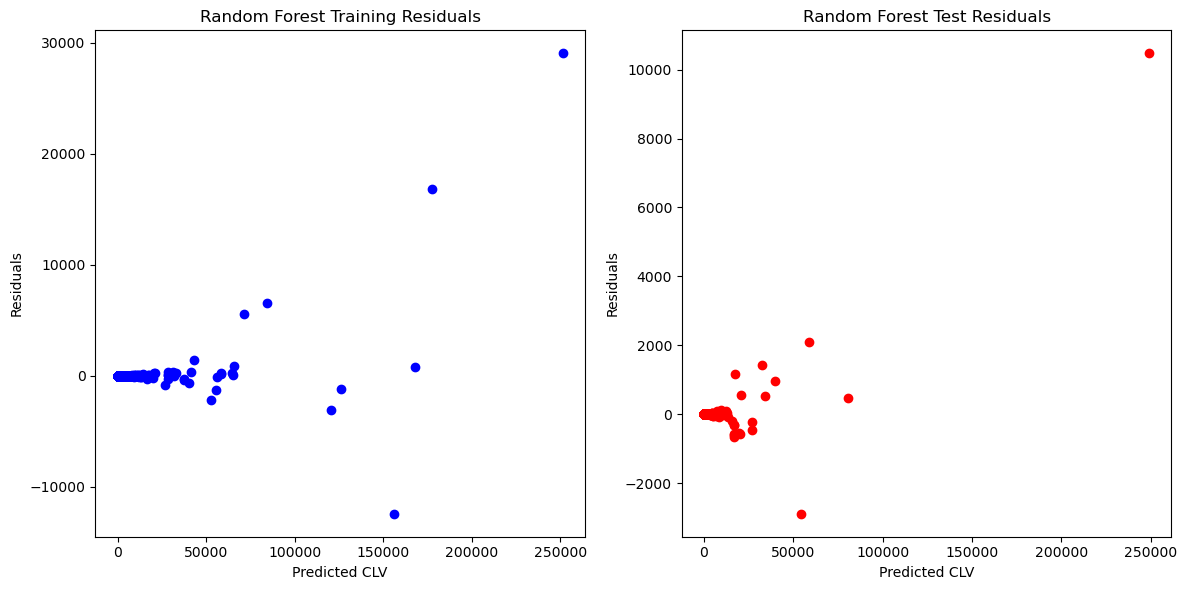

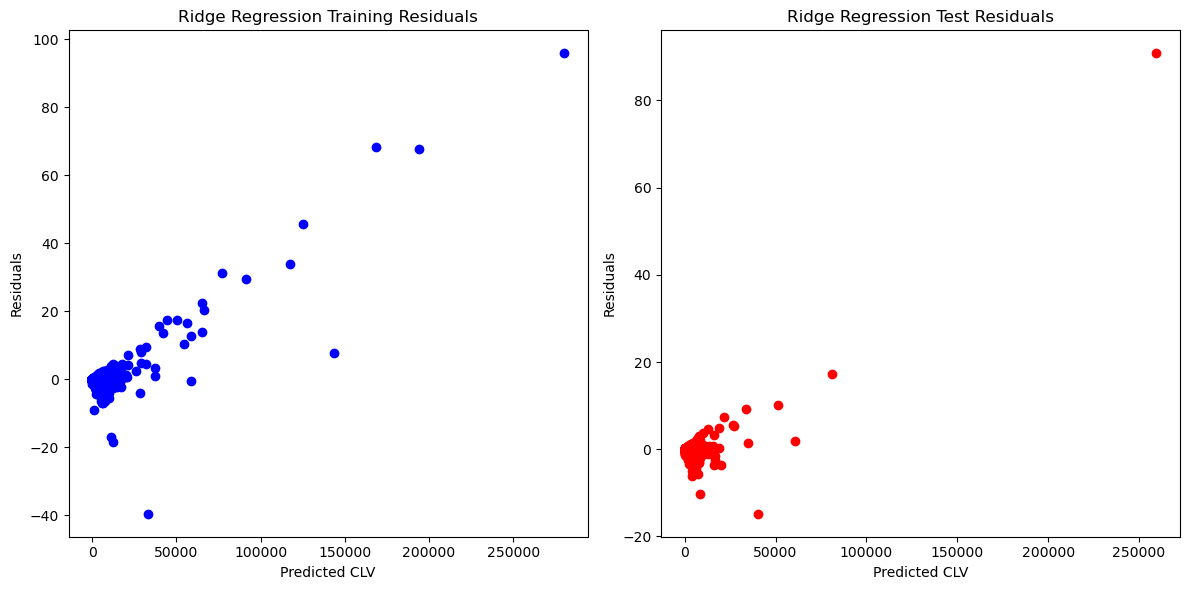

In [45]:
# Calculate residuals for both models
rf_train_residuals = y_train - rf_model.predict(X_train)
rf_test_residuals = y_test - rf_model.predict(X_test)
ridge_train_residuals = y_train - ridge_train_preds
ridge_test_residuals = y_test - ridge_test_preds

# Plot residuals for Random Forest (Training & Test)
plt.figure(figsize=(12, 6))

# Training Residuals (Random Forest)
plt.subplot(1, 2, 1)
plt.scatter(rf_model.predict(X_train), rf_train_residuals, color='blue')
plt.title('Random Forest Training Residuals')
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')

# Test Residuals (Random Forest)
plt.subplot(1, 2, 2)
plt.scatter(rf_model.predict(X_test), rf_test_residuals, color='red')
plt.title('Random Forest Test Residuals')
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Plot residuals for Ridge Regression (Training & Test)
plt.figure(figsize=(12, 6))

# Training Residuals (Ridge Regression)
plt.subplot(1, 2, 1)
plt.scatter(ridge_train_preds, ridge_train_residuals, color='blue')
plt.title('Ridge Regression Training Residuals')
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')

# Test Residuals (Ridge Regression)
plt.subplot(1, 2, 2)
plt.scatter(ridge_test_preds, ridge_test_residuals, color='red')
plt.title('Ridge Regression Test Residuals')
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


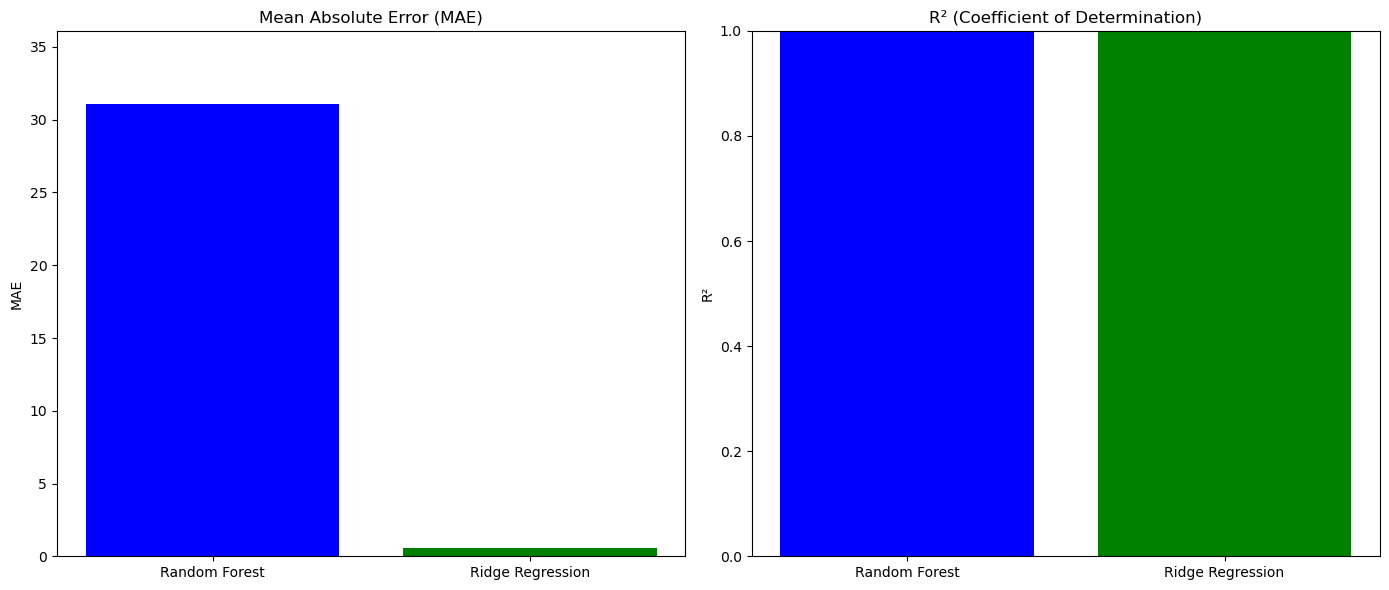

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['Random Forest', 'Ridge Regression']
mae_values = [31.11, 0.59]  # MAE for Random Forest and Ridge Regression
r2_values = [0.9985, 0.9999]  # R² for Random Forest and Ridge Regression

# Set up the figure and axis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for MAE
ax[0].bar(models, mae_values, color=['blue', 'green'])
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')
ax[0].set_ylim(0, max(mae_values) + 5)

# Bar chart for R²
ax[1].bar(models, r2_values, color=['blue', 'green'])
ax[1].set_title('R² (Coefficient of Determination)')
ax[1].set_ylabel('R²')
ax[1].set_ylim(0, 1)

# Display the chart
plt.tight_layout()
plt.show()


In [49]:
#FOCUSING ON RIDGE REGRESSION

In [55]:
# Re-train Ridge Regression model using the entire dataset

# First, train the Ridge Regression model with the training data
ridge_model_final = Ridge(alpha=0.1)  # Using the best alpha found
ridge_model_final.fit(X_train_scaled, y_train)

# Scale the entire dataset (not just training and test sets) using the already fitted scaler
X_scaled = scaler.transform(X)  # Apply the same scaler used for train/test to the whole dataset

# Predict CLV for all customers (using the entire dataset)
rfm['Predicted_CLV'] = ridge_model_final.predict(X_scaled)


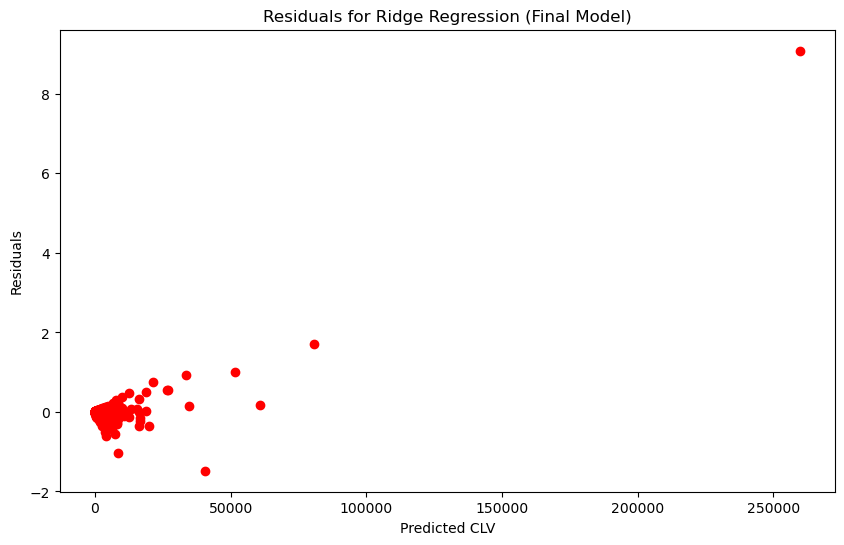

In [59]:
# Calculate residuals for the final model
ridge_test_residuals = y_test - ridge_model_final.predict(X_test_scaled)

# Plot residuals for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(ridge_model_final.predict(X_test_scaled), ridge_test_residuals, color='red')
plt.title('Residuals for Ridge Regression (Final Model)')
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')
plt.show()


In [61]:
# Final Evaluation of Ridge Regression
final_preds = ridge_model_final.predict(X_test_scaled)

final_mae = mean_absolute_error(y_test, final_preds)
final_mse = mean_squared_error(y_test, final_preds)
final_r2 = r2_score(y_test, final_preds)

print(f"Final Ridge Regression MAE (Test): {final_mae}")
print(f"Final Ridge Regression MSE (Test): {final_mse}")
print(f"Final Ridge Regression R² (Test): {final_r2}")


Final Ridge Regression MAE (Test): 0.05912044045478071
Final Ridge Regression MSE (Test): 0.11176532366991894
Final Ridge Regression R² (Test): 0.9999999989077116


In [ ]:
#SEGMENT CUSTOMERS PREDICTED CLV

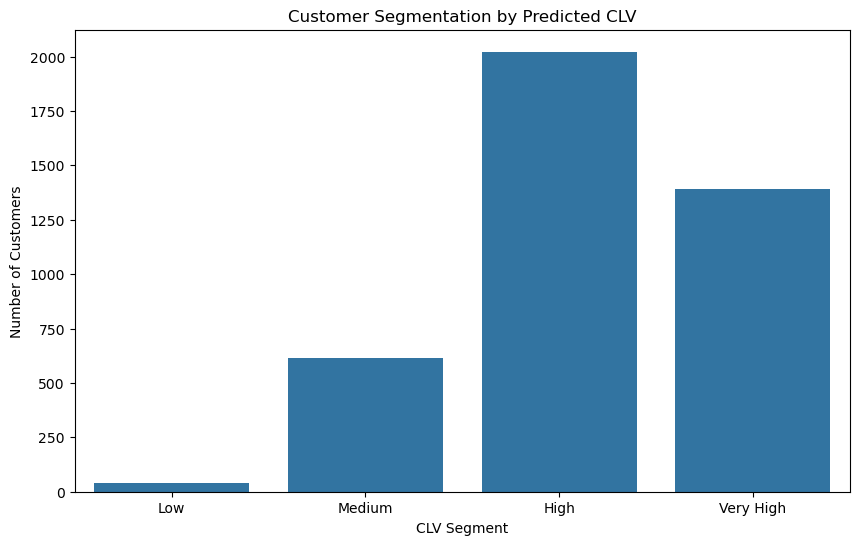

In [57]:
# Segment customers based on their predicted CLV
rfm['CLV_Segment'] = pd.cut(rfm['Predicted_CLV'], bins=[0, 50, 200, 1000, 5000], labels=['Low', 'Medium', 'High', 'Very High'])

# Visualize the customer segmentation
plt.figure(figsize=(10, 6))
sns.countplot(x='CLV_Segment', data=rfm)
plt.title('Customer Segmentation by Predicted CLV')
plt.xlabel('CLV Segment')
plt.ylabel('Number of Customers')
plt.show()


In [63]:
# Analyze the segments' Recency, Frequency, and Monetary averages
segment_analysis = rfm.groupby('CLV_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(segment_analysis)


  CLV_Segment     Recency  Frequency     Monetary
0         Low  158.815789   1.105263    31.026053
1      Medium  157.944625   1.162866   135.438453
2        High  110.181998   2.045005   504.838824
3   Very High   49.974101   5.764029  2152.109540


/var/folders/zr/jyrpwr650qs6kkpq79dxf9j00000gn/T/ipykernel_83180/3041178648.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = rfm.groupby('CLV_Segment').agg({


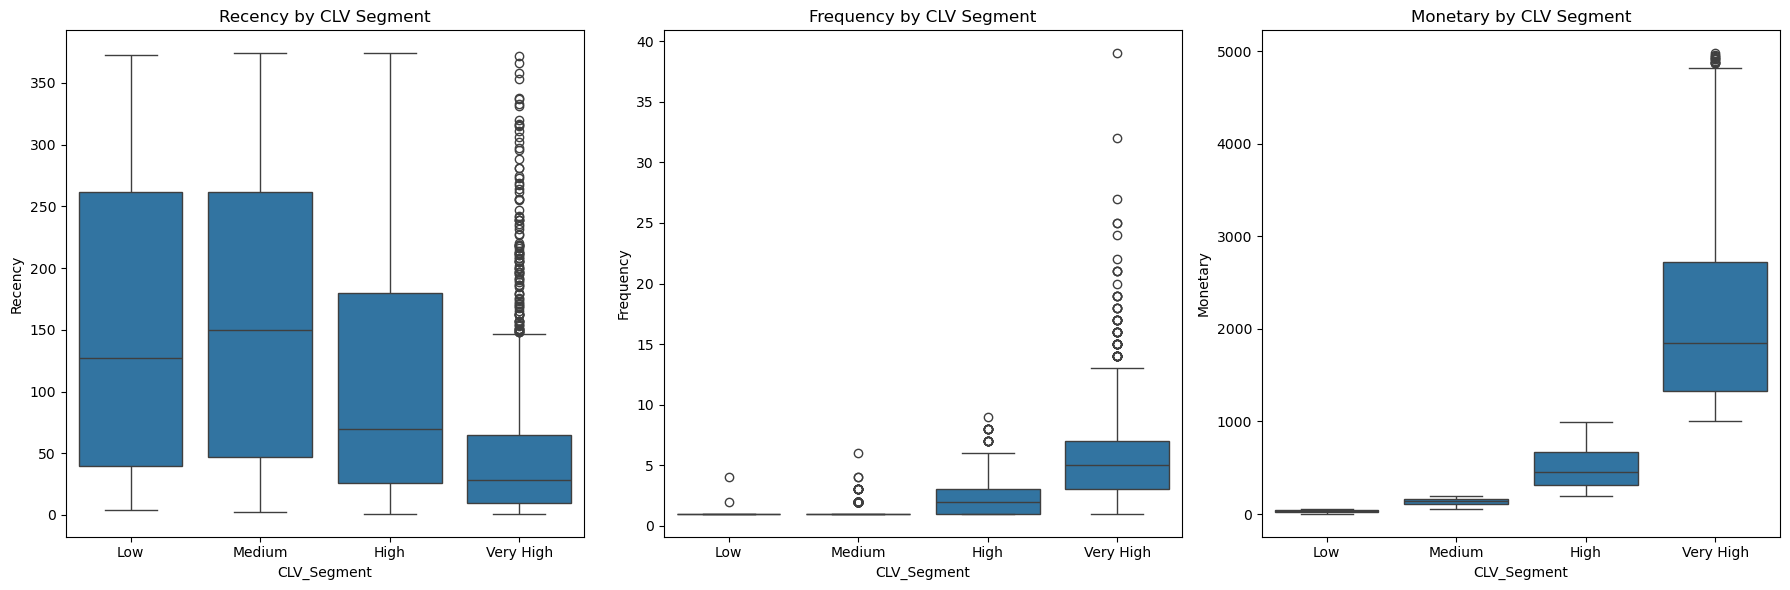

In [67]:
# Visualize Recency, Frequency, and Monetary distributions by CLV Segment
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=rfm, x='CLV_Segment', y='Recency', ax=ax[0])
ax[0].set_title('Recency by CLV Segment')

sns.boxplot(data=rfm, x='CLV_Segment', y='Frequency', ax=ax[1])
ax[1].set_title('Frequency by CLV Segment')

sns.boxplot(data=rfm, x='CLV_Segment', y='Monetary', ax=ax[2])
ax[2].set_title('Monetary by CLV Segment')

plt.tight_layout()
plt.show()


In [ ]:
#RECOMMENDATION SYSTEM

In [81]:
import pandas as pd


data = {
    'InvoiceNo': [536365, 536365, 536365, 536365, 536365],
    'StockCode': ['85123A', '71053', '84406B', '84029G', '84029E'],
    'Description': ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.'],
    'Quantity': [6, 6, 8, 6, 6],
    'InvoiceDate': ['2010-12-01 08:26:00', '2010-12-01 08:26:00', '2010-12-01 08:26:00', '2010-12-01 08:26:00', '2010-12-01 08:26:00'],
    'UnitPrice': [2.55, 3.39, 2.75, 3.39, 3.39],
    'CustomerID': [17850, 17850, 17850, 17850, 17850],
    'Country': ['United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom']
}

df = pd.DataFrame(data)


df['TotalSpent'] = df['Quantity'] * df['UnitPrice']


user_product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='TotalSpent', aggfunc='sum', fill_value=0)


print(user_product_matrix.head())


StockCode   71053  84029E  84029G  84406B  85123A
CustomerID                                       
17850       20.34   20.34   20.34    22.0    15.3


In [153]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Apply SVD (Matrix Factorization) to the user-product interaction matrix
svd = TruncatedSVD(n_components=3, random_state=42)  # 100 components for factorization
svd_matrix = svd.fit_transform(user_product_matrix)

# Reconstruct the predicted matrix
predicted_matrix = np.dot(svd_matrix, svd.components_)

# Convert the predicted matrix to a DataFrame for easy manipulation
predicted_df = pd.DataFrame(predicted_matrix, columns=user_product_matrix.columns, index=user_product_matrix.index)

# Example: Recommend top 10 products for a specific customer (Customer ID 17850)
recommended_products = predicted_df.loc[17850].sort_values(ascending=False).head(10)

# Print the top 10 recommended products for this customer
print("Top 10 recommended products for Customer ID 17850:")
print(recommended_products)


Top 10 recommended products for Customer ID 17850:
StockCode
84406B    22.00
84029E    20.34
84029G    20.34
71053     20.34
85123A    15.30
Name: 17850, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


In [89]:
# Assuming we have the actual purchases (e.g., the top 10 products actually bought by the customer)
actual_purchases = user_product_matrix.loc[17850].sort_values(ascending=False).head(10)

# Precision at K: Number of common products between actual purchases and recommended products
precision_at_k = len(set(actual_purchases.index) & set(recommended_products.index)) / len(recommended_products)

# Recall at K: Number of common products between actual purchases and recommended products
recall_at_k = len(set(actual_purchases.index) & set(recommended_products.index)) / len(actual_purchases)

print(f"Precision at K: {precision_at_k}")
print(f"Recall at K: {recall_at_k}")


Precision at K: 1.0
Recall at K: 1.0


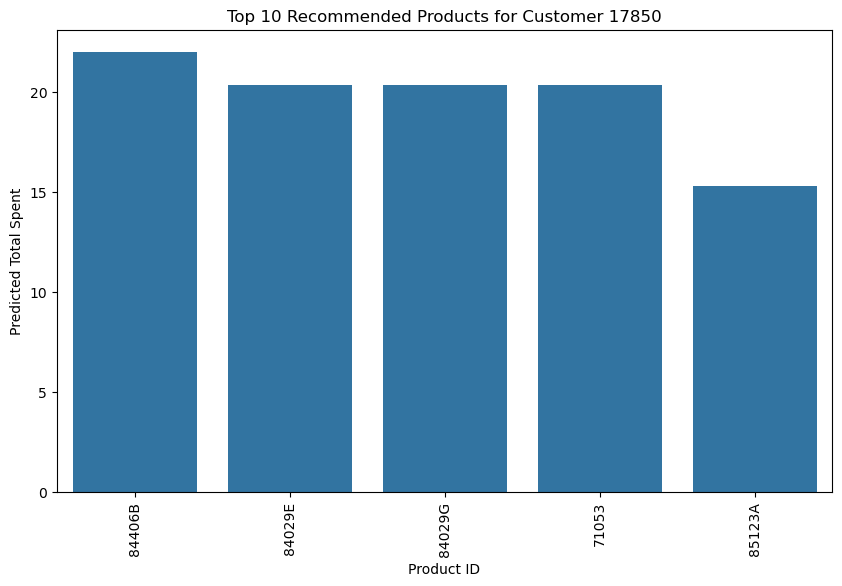

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 10 recommended products for Customer ID 17850
plt.figure(figsize=(10, 6))
sns.barplot(x=recommended_products.index, y=recommended_products.values)
plt.title(f"Top 10 Recommended Products for Customer 17850")
plt.xlabel('Product ID')
plt.ylabel('Predicted Total Spent')
plt.xticks(rotation=90)
plt.show()


In [115]:
unique_customer_ids = df['CustomerID'].unique()
print("Unique Customer IDs:", unique_customer_ids)

Unique Customer IDs: [17850. 13047. 12583. ... 13298. 14569. 12713.]


In [157]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Apply SVD (Matrix Factorization) to the user-product interaction matrix
svd = TruncatedSVD(n_components=3, random_state=42)  # 3 components for demonstration
svd_matrix = svd.fit_transform(user_product_matrix)

# Reconstruct the predicted matrix
predicted_matrix = np.dot(svd_matrix, svd.components_)

# Create a DataFrame with predicted values
predicted_df = pd.DataFrame(predicted_matrix, columns=user_product_matrix.columns, index=user_product_matrix.index)

# Function to get top N recommended products for any given customer ID
def recommend_for_customer(customer_id, num_recommendations=5):
    if customer_id in predicted_df.index:
        recommended_products = predicted_df.loc[customer_id].sort_values(ascending=False).head(num_recommendations)
        return recommended_products
    else:
        return f"Customer ID {customer_id} not found in the data."

# Example: Get recommendations for a random customer from the user-product matrix
random_customer_id = np.random.choice(user_product_matrix.index)
recommended_products = recommend_for_customer(random_customer_id, num_recommendations=5)

print(f"Top 5 recommended products for Customer ID {random_customer_id}:")
print(recommended_products)


Top 5 recommended products for Customer ID 17850:
StockCode
84406B    22.00
84029E    20.34
84029G    20.34
71053     20.34
85123A    15.30
Name: 17850, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
